In [51]:
import gzip
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import cmocean

## Plot global seismicity catalog

In [19]:
quakes = []
with gzip.open("../data/jan76_dec17.ndk.gz", "rt") as quake_file:
    for i, line in enumerate(quake_file):
        if i % 5 == 0:
            # The line looks like this:
            #   MLI  1976/01/01 01:29:39.6 -28.61 -177.64  59.0 6.2 0.0 KERMADEC ISLANDS REGION 
            parts = line.split()
            latitude, longitude, depth, magnitude = parts[3:7]
            quakes.append([latitude, longitude, depth, magnitude])
quakes = np.array(quakes, dtype="float32")

In [20]:
quakes

array([[ -28.61, -177.64,   59.  ,    6.2 ],
       [ -13.29,  -74.9 ,   95.  ,    6.  ],
       [  51.6 ,  159.33,   33.  ,    5.7 ],
       ...,
       [  -8.12,   68.06,   10.  ,    0.  ],
       [ -53.03, -118.35,   10.  ,    0.  ],
       [  17.86,  145.89,  156.6 ,    0.  ]], dtype=float32)

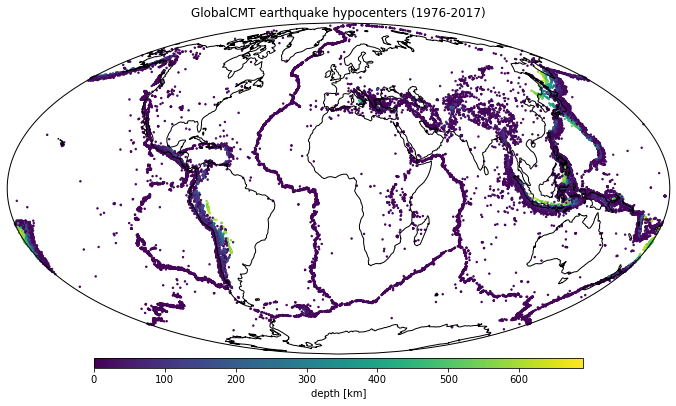

In [49]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("GlobalCMT earthquake hypocenters (1976-2017)")
tmp = ax.scatter(quakes[:, 1], quakes[:, 0], s=2, c=quakes[:, 2], transform=ccrs.PlateCarree())
plt.colorbar(tmp, label="depth [km]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.savefig("../slides/1-plate-tectonics/global-seismicity.png", dpi=200)
plt.show()

## EMAG2

## Earth Relief

In [44]:
topo = xr.open_dataarray("../data/earth_relief_10m.grd")
topo

<xarray.DataArray 'z' (lat: 1081, lon: 2161)>
[2336041 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.7 -179.5 ... 179.7 179.8 180.0
  * lat      (lat) float64 -90.0 -89.83 -89.67 -89.5 ... 89.5 89.67 89.83 90.0
Attributes:
    long_name:     elevation (m)
    actual_range:  [-10399.   6280.]

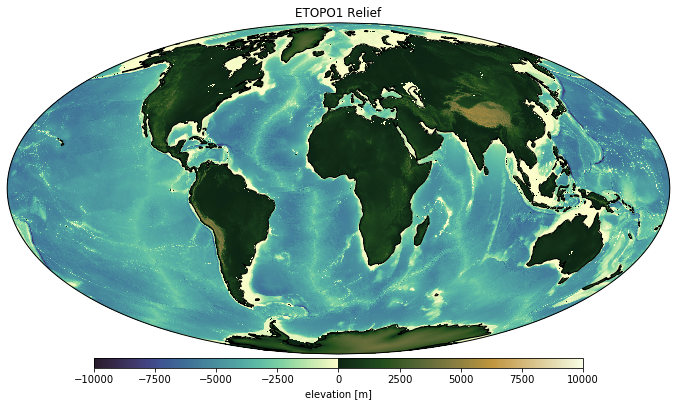

In [55]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("ETOPO1 Relief")
tmp = ax.pcolormesh(
    topo.lon, topo.lat, topo.values, transform=ccrs.PlateCarree(), 
    vmin=-10000, vmax=10000, cmap=cmocean.cm.topo
)
plt.colorbar(tmp, label="elevation [m]", orientation="horizontal", aspect=50, pad=0.01, shrink=0.7)
ax.coastlines()
plt.tight_layout()
plt.savefig("../slides/1-plate-tectonics/topography.png", dpi=200)
plt.show()